In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn.metrics

import tissue.api as tissue

import scanpy as sc
from statannot import add_stat_annotation

sc.settings.set_figure_params(dpi=80)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# user = "david.fischer"
# user = "ina"
user = "mayar.ali"

if user == "david.fischer":
    base_path_gcn = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
    base_path_mi = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
    base_path_reg = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
elif user == "ina":
    base_path_gcn = '../../results/GCN/basel_zurich/'
    base_path_reg = '../../results/REG/basel_zurich/'
    
elif user == "mayar.ali":
    base_path_gcn = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"
    base_path_mi = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"
    base_path_reg = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"


In [4]:
dir_figures="/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/schuerch/"

In [5]:
data_key='sch'
group_name='Group'
feature_space='molecular'

### 1. Benchmarking molecular features models


A. Loading trained models

In [6]:
source_path={
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK": base_path_gcn,
        "2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK": base_path_gcn,
        "2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE": base_path_mi,
        "2205181007_REG_GRADE_STANDARD_schuerch_": base_path_reg,
    }

gs_ids=[
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK",
        "2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK",
        "2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE",
        "2205181007_REG_GRADE_STANDARD_schuerch_"
    ]

In [7]:
# loading trained models
container_std = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
    
)
container_std.load_gs()

loaded 2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 36 runs with 6-fold cross validation
loaded 2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 4 runs with 6-fold cross validation
loaded 2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE: 4 runs with 6-fold cross validation
loaded 2205181007_REG_GRADE_STANDARD_schuerch_: 72 runs with 6-fold cross validation


B. Model comparison analysis

selected ['model_class']
means=model_class
GCN      0.489583
GCNSS    0.531250
MI       0.562500
MLP      0.468750
Name: test_Group_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP_molecular v.s. MI_molecular: t-test independent samples, P_val=4.584e-01 stat=-7.712e-01
MI_molecular v.s. GCN_molecular: t-test independent samples, P_val=5.177e-01 stat=6.705e-01
MI_molecular v.s. GCNSS_molecular: t-test independent samples, P_val=7.732e-01 stat=2.962e-01


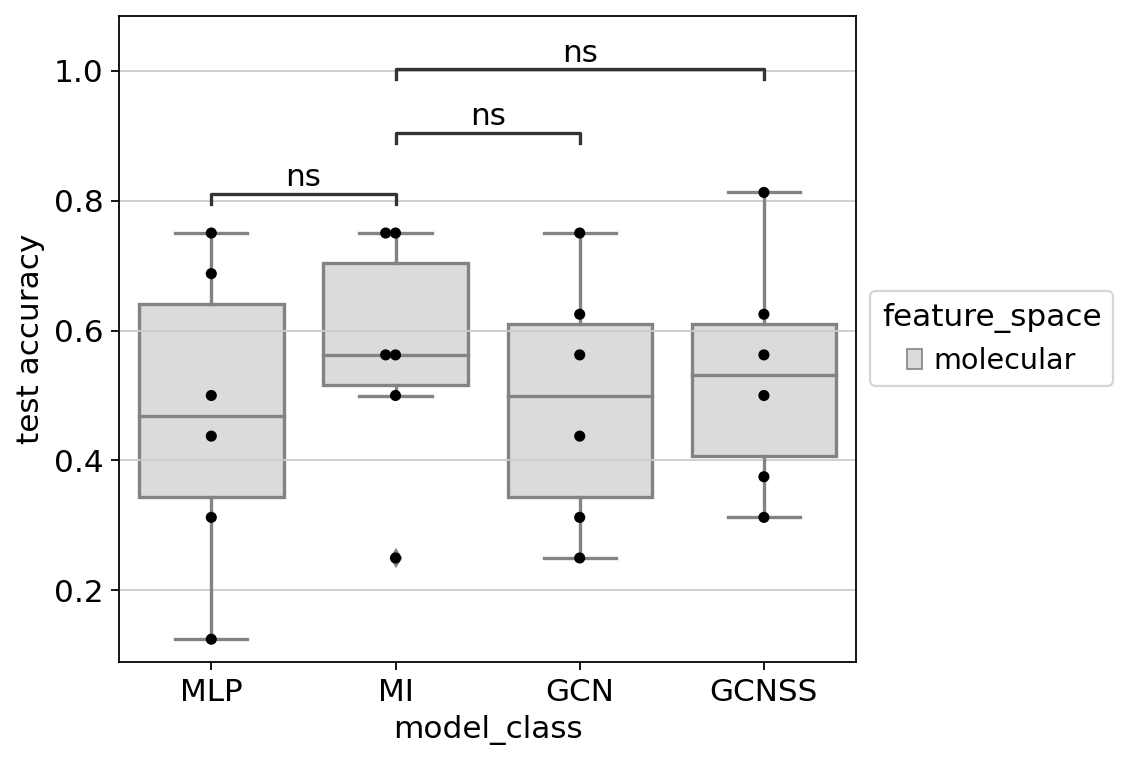

In [7]:
sns.set_palette("gray_r")

container_std.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",
    param_x=['model_class'],
#     save=dir_figures+f"model_comaprison_accuracy_{feature_space}", 
    suffix=".pdf",
    panel_width = 7,
    panel_height = 5,
    ttest = True,
)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP v.s. MI: t-test independent samples, P_val=7.645e-01 stat=3.034e-01
MI v.s. GCN: t-test independent samples, P_val=9.295e-01 stat=8.943e-02
MI v.s. GCNSS: t-test independent samples, P_val=2.520e-01 stat=-1.176e+00


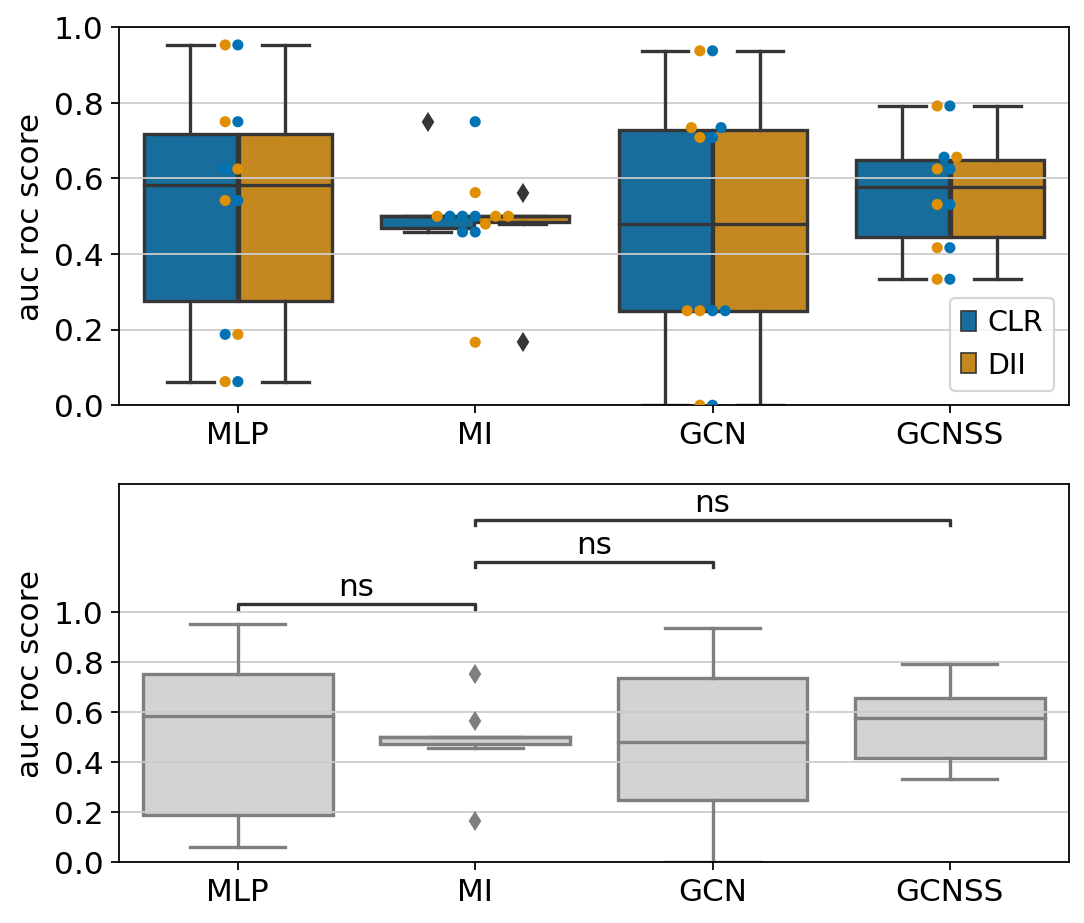

In [9]:
sns.set_palette('colorblind')

container_std.plot_best_model_roc_auc(
    partition_show="test",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    suffix=".pdf",
    panel_width = 7,
    panel_height = 6,
    load_labels=[group_name],
    data_key="sch",
    plot_all_groups=True,
    ttest=True,
    save=dir_figures+f"model_comparison_roc_auc_{feature_space}_fig2c"
)

### 2. Analysis on GCN SS

In [6]:
model_class="GCNSS"

A. Loading GCN SS model

In [7]:
container_gcnss = tissue.fits.GridSearchContainer(
    source_path={
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK": base_path_gcn,
        
    },
    gs_ids=[
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK",
    ]
)
container_gcnss.load_gs()

loaded 2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 36 runs with 6-fold cross validation


In [8]:
# selecting best model based on training accuracy
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train')
container_gcnss.get_info(gs_id = gs_id, model_id=model_id, load_labels=[group_name])

B. GCN SS analysis

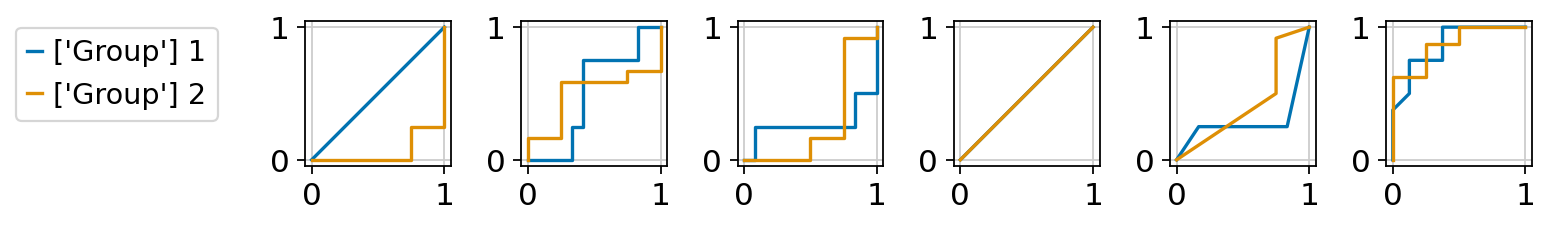

In [15]:
# plotting roc curve for 6-fold cv
sns.set_palette("colorblind")
container_gcnss.plot_roc(
                         partition='test', 
                         load_labels=[group_name], 
#                          save=dir_figures+f"gcnss_roc_curve_{feature_space}_suppfig3a.pdf"
                        )

Confusion matrix on test set:


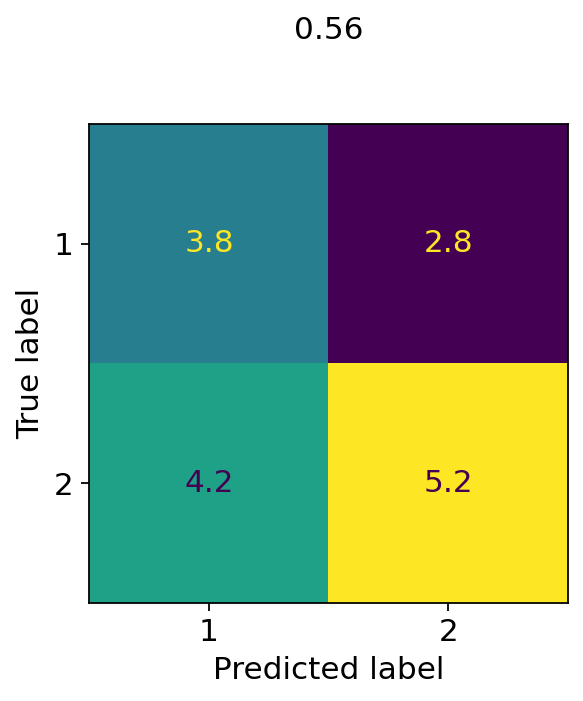

Confusion matrix on train set:


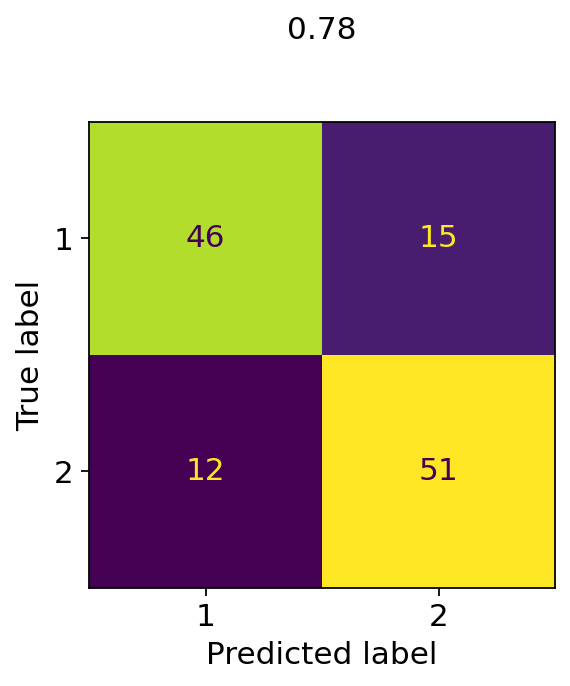


test
Group 1 : 0.4791666666666667
Group 2 : 0.5208333333333334
mean : 0.5625

train
Group 1 : 0.7552083333333334
Group 2 : 0.8250000000000001
mean : 0.7836021505376344


In [16]:
# plotting confusion metrices

sns.set_palette('colorblind')

print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label=group_name,
    partition_show='test',
    mean_across_cv=True,
#     save=dir_figures+f"gcnss_analysis_confusion_mtx_test_{feature_space}", 
    x_ticks=['1', '2'],
)


print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label=group_name,
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+f"gcnss_analysis_confusion_mtx_train_{feature_space}", 
    x_ticks=['1', '2']
)


for partition in ['test', 'train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition][group_name], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition][group_name], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Group", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)

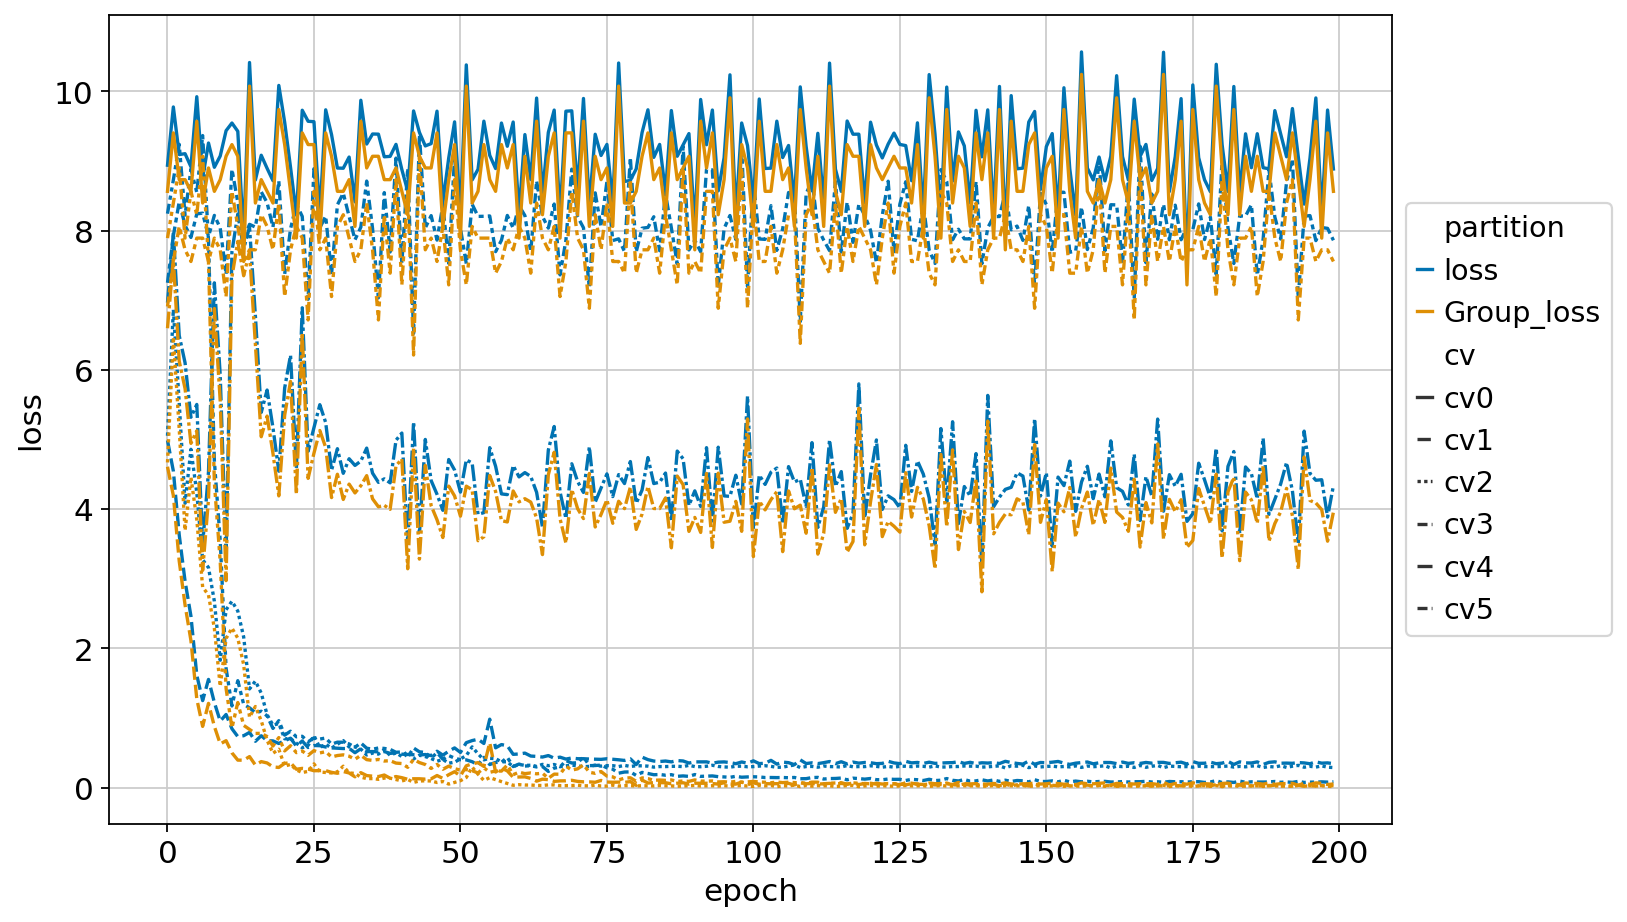

In [17]:
container_gcnss.plot_training_history(
    plot_metrics=['loss', f'{group_name}_loss'],
#     save=dir_figures+f"gcnss_analysis_training_history_curve_{feature_space}_suppfig5f", 
)

C. GCN SS interpretation analysis 

In [10]:
# loading data into interpreter class
interpreter = tissue.fits.InterpreterGraph(
    results_path=base_path_gcn + gs_id + "/results/", 
    cv=cv, 
    model_id=model_id,
    model_class=model_class
)
interpreter.load_model()

data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer/"
interpreter.get_data_again(
    data_path=data_path,
    buffered_data_path=buffered_data_path,
)

2022-10-07 11:19:38.035431: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer//buffered_data_50_binary.pickle
Loading data from buffer
Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 2 distinct celltypes.

Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 124 images from 31 patients.
Validation dataset: 0 images from 0 patients.



In [20]:
sns.set_palette("colorblind")

# analysing accuracy and sample counts for varying node degrees
preds = np.argmax(container_gcnss.info[interpreter.cv]['predictions']['train'][group_name], axis=1)
true = np.argmax(container_gcnss.true_labels[interpreter.cv]['train'][group_name], axis=1)
acc = preds == true

idx = interpreter.img_keys_train
degrees = [np.mean(interpreter.data.img_celldata[image_key].obsp['adjacency_matrix_connectivities'].sum(axis=1))
            for image_key in idx]


nodes_sorted = np.sort(degrees)
order = np.argsort(degrees)
acc_sorted = np.array(acc)[order]
true_sorted = np.array(true)[order]

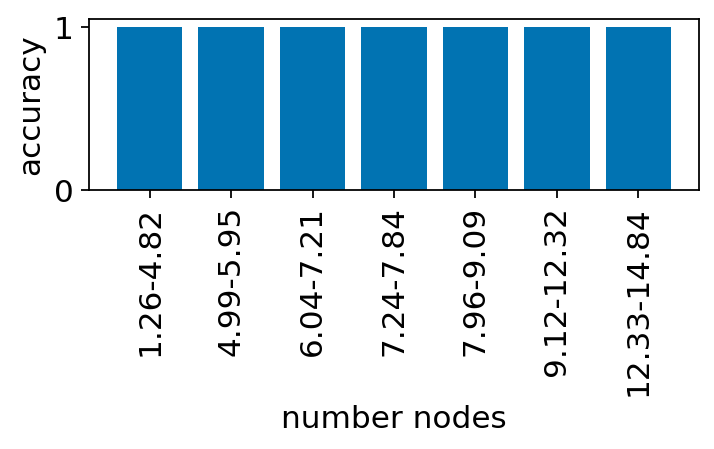

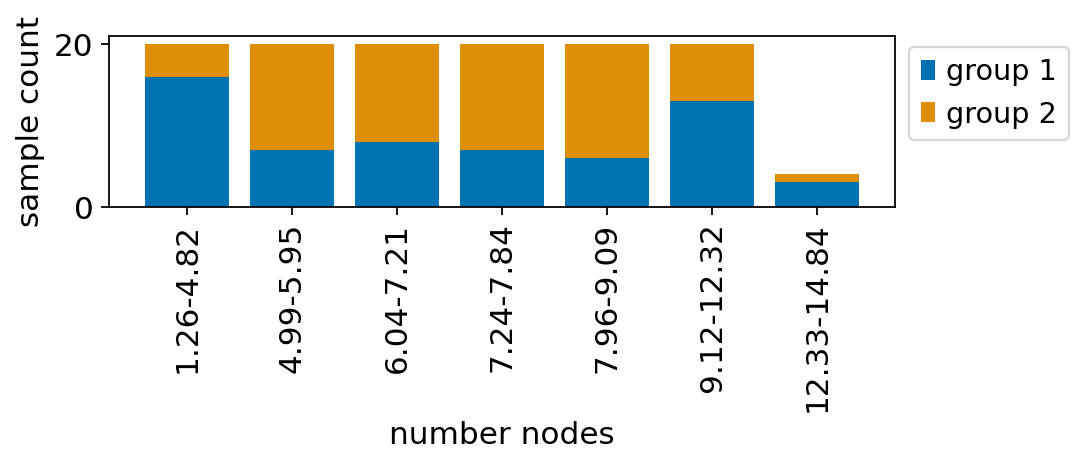

In [21]:
size = 20
accs = []
labels = []
plt.figure(figsize=(5,3))
a = []
b = []
c = []
for i in range(len(order)//size):
    accs.append(np.mean(acc_sorted[i*size:(i+1)*size]))
    labels.append(str(np.round(nodes_sorted[i*size], 2)) + '-' + str(np.round(nodes_sorted[(i+1)*size-1],2)))
    a.append(np.sum(true_sorted[i*size:(i+1)*size] == 0))
    b.append(np.sum(true_sorted[i*size:(i+1)*size] == 1))
accs.append(np.mean(acc_sorted[len(order)//size*size:]))
labels.append(str(np.round(nodes_sorted[len(order)//size*size],2)) + '-' + str(np.round(nodes_sorted[-1], 2)))
a.append(np.sum(true_sorted[len(order)//size*size:] == 0))
b.append(np.sum(true_sorted[len(order)//size*size:] == 1))
plt.bar(height=accs, x=np.arange(len(accs)))
plt.xticks(np.arange(len(accs)), labels, rotation=90)
plt.xlabel('number nodes')
plt.ylabel('accuracy')
plt.tight_layout()
plt.grid(False)
# plt.savefig(dir_figures + f'gcnss_interpretation_node_degree_accuracy_{feature_space}_supfig3b.pdf')
plt.show()
    
plt.figure(figsize=(7,3))
plt.bar(x=np.arange(len(accs)), height=a, label='group 1')
plt.bar(x=np.arange(len(accs)), height=b, bottom=a, label='group 2')
plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.xlabel('number nodes')
plt.ylabel('sample count')
plt.xticks(np.arange(len(accs)), labels, rotation=90)
plt.tight_layout()
plt.grid(False)
# plt.savefig(dir_figures + f'gcnss_interpretation_node_degree_sample_count_{feature_space}_supfig3c.pdf')
plt.show()

2022-10-07 11:25:35.613826: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-07 11:25:35.791579: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2700000000 Hz


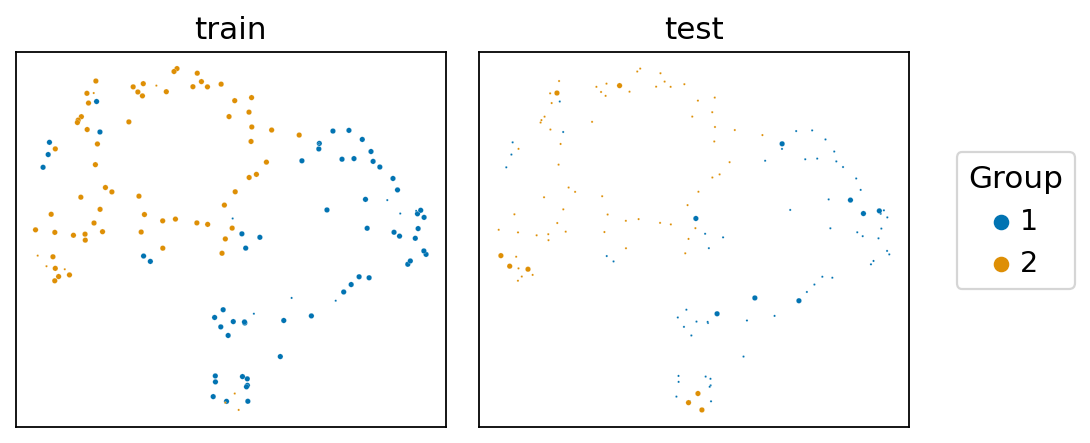

In [12]:
# plotting UMAP of graph embeddings
embedding, hue = interpreter.plot_umap_graphs(
    label=group_name,
    data_key=data_key,
    return_embeddings=True,
    save=dir_figures + f'gcnss_interpretation_umap_graph_{feature_space}_fig3c.pdf',
)

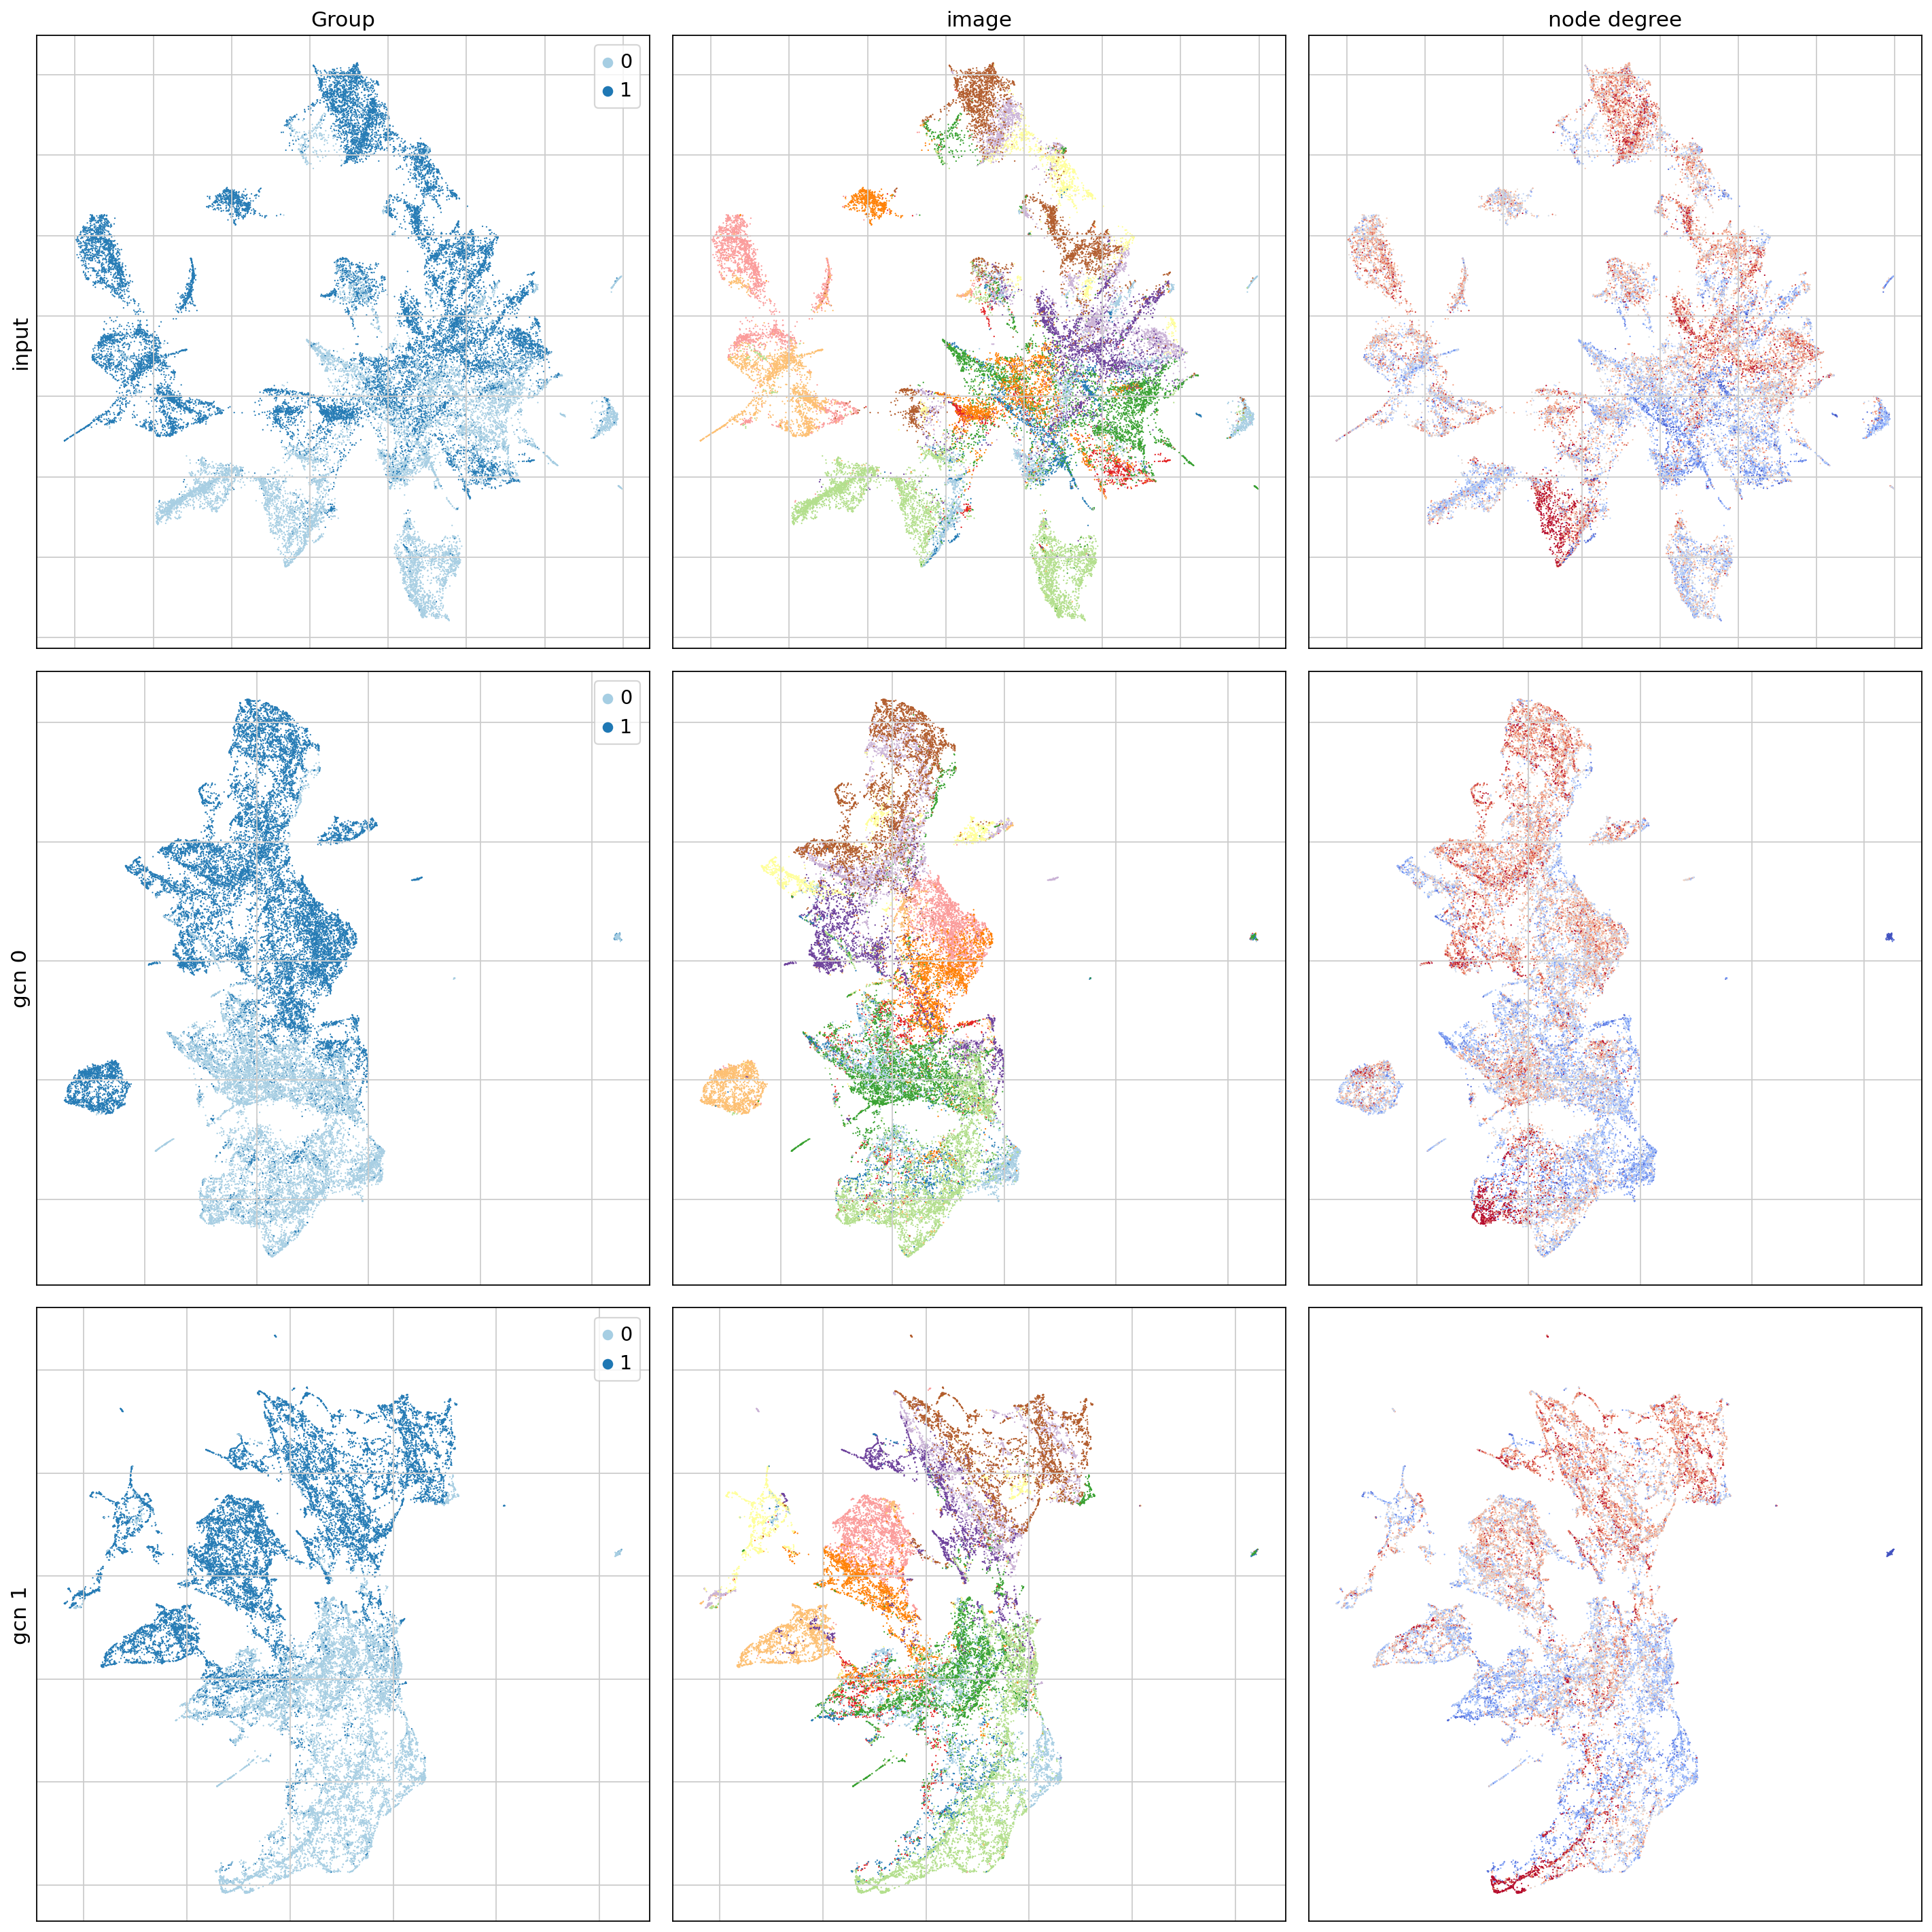

In [34]:
# plotting UMAP of node embeddings for the different gcn layers
interpreter.plot_umap_nodes(
    interpreter.img_keys_test,
    plot_types = [group_name, 'images', 'degree'],
    layer_names=[
        'input',
        'Layer_gcn_0',
        'Layer_gcn_1',
    ],
    panel_width=6.0,
    panel_height=6.0,
    data_key=data_key,
    # plt.savefig(dir_figures + f'gcnss_interpretation_umap_nodes_{feature_space}.pdf')
)

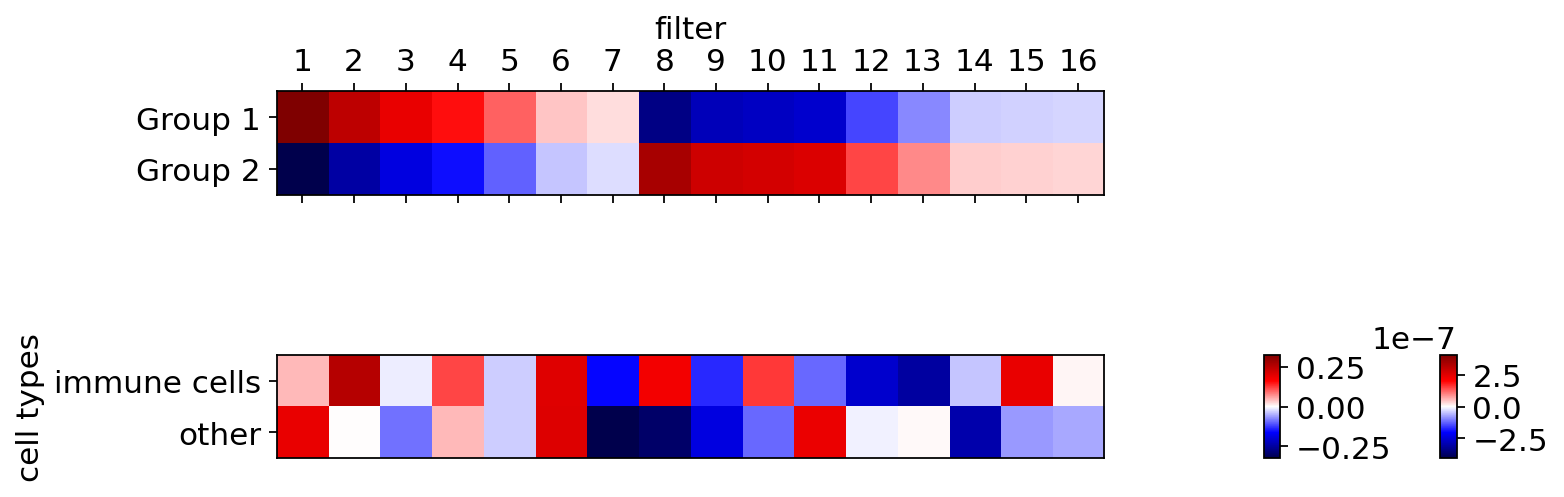

In [25]:
# plotting weight filters for first layer of gcn sorted by groups
interpreter.plot_weight_matrix(
    layer_name='Layer_gcn_0', 
    target_label=group_name,
    panel_width=10,
    panel_height=10,
    # plt.savefig(dir_figures + f'gcnss_interpretation_filters_weights_{feature_space}_fig3c.pdf')
)
